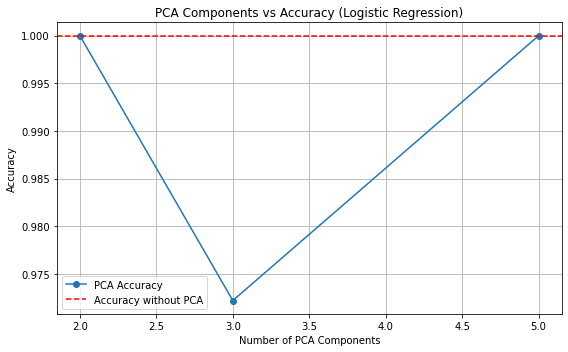

Accuracy without PCA: 1.0000
Accuracy with PCA (2 components): 1.0000
Accuracy with PCA (3 components): 0.9722
Accuracy with PCA (5 components): 1.0000


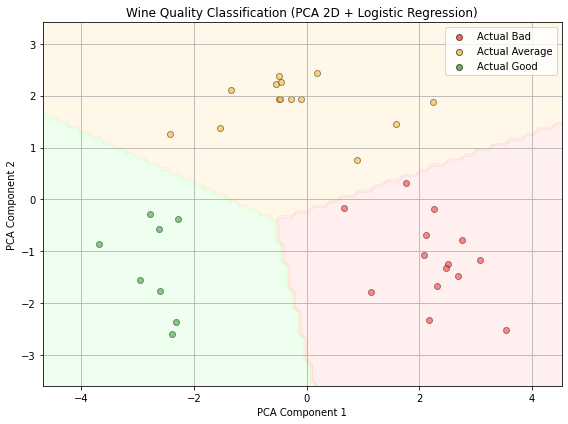

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Map wine targets (0,1,2) to quality labels: simulate for this dataset
# Let's assume:
# class 0 -> Bad
# class 1 -> Average
# class 2 -> Good
df['quality_label'] = df['target']

# Features and labels
X = df.drop(['target', 'quality_label'], axis=1)
y = df['quality_label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression without PCA
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)

# PCA with components
components_list = [2, 3, 5]
pca_accuracies = {}

for n in components_list:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    model_pca = LogisticRegression(max_iter=1000)
    model_pca.fit(X_train_pca, y_train_pca)
    y_pred_pca = model_pca.predict(X_test_pca)
    acc = accuracy_score(y_test_pca, y_pred_pca)
    pca_accuracies[n] = acc

# Plot comparison
plt.figure(figsize=(8,5))
plt.plot(components_list, list(pca_accuracies.values()), marker='o', label='PCA Accuracy')
plt.axhline(y=baseline_acc, color='r', linestyle='--', label='Accuracy without PCA')
plt.title('PCA Components vs Accuracy (Logistic Regression)')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print all accuracies
print(f"Accuracy without PCA: {baseline_acc:.4f}")
for comp, acc in pca_accuracies.items():
    print(f"Accuracy with PCA ({comp} components): {acc:.4f}")
from matplotlib.colors import ListedColormap

# Apply PCA to reduce to 2D for visualization
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

# Train model on 2D PCA data
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)
model_vis = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
model_vis.fit(X_train_vis, y_train_vis)
y_pred_vis = model_vis.predict(X_test_vis)

# Plot
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'green']
labels = ['Bad', 'Average', 'Good']
for i, color in enumerate(colors):
    plt.scatter(X_test_vis[y_test_vis==i, 0], X_test_vis[y_test_vis==i, 1], color=color, label=f"Actual {labels[i]}", alpha=0.6, edgecolors='k')

# Also plot predicted classes as background
x_min, x_max = X_test_vis[:, 0].min() - 1, X_test_vis[:, 0].max() + 1
y_min, y_max = X_test_vis[:, 1].min() - 1, X_test_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_background = ListedColormap(['#ffcccc', '#ffe5b4', '#ccffcc'])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

plt.title("Wine Quality Classification (PCA 2D + Logistic Regression)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()